# Pandas  | Data Combining 
---
In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, __it's very common in practice to work with more than one data set at a time.__ <br>

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

- Did world happiness increase, decrease, or stay about the same from 2015 to 2017?


### Instructions

_We've already read the World_Happiness_2015.csv file into a dataframe called happiness2015._
 
1. Use the `pandas.read_csv()` function to read the `World_Happiness_2016.csv` file into a dataframe called `happiness2016` and the `World_Happiness_2017.csv` file into a dataframe called `happiness2017`.
2. __Add a column called `Year` to each dataframe__ with the corresponding year. For example, the Year column in happiness2015 should contain the value 2015 for each row.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015.index.name = None
happiness2015["Year"] = 2015

happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2015.index.name = None
happiness2016["Year"] = 2016

happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017.index.name = None
happiness2017["Year"] = 2017

In [2]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

- - - 
## Instructions

__We've already saved the subsets from happiness2015 and happiness2016 to the variables head_2015 and head_2016.__

1. Use the  __`pd.concat()`__ function to combine head_2015 and head_2016 along axis = 0.__ Remember to pass the head_2015 and head_2016 into the function as a list. Assign the result to `concat_axis0`.
2. Use the __`pd.concat()`__ function to combine head_2015 and head_2016 along axis = 1.__ Remember to pass head_2015 and head_2016 into the function as a list and set the axis parameter equal to 1. Assign the result to `concat_axis1`.
3. Use the variable inspector to view concat_axis0 and concat_axis1.
4. Assign the number of rows in `concat_axis0` to a variable called `question1`.
5. Assign the number of rows in `concat_axis1` to a variable called `question2`.

#### Solution:

- - -
###### Notes:  how to count rows and collumns in Dataframe. 

`count_row = df.shape[0]`  _# gives number of row count_ <br>
`count_col = df.shape[1]`  _# gives number of col count_
- - -

In [3]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
question1 = concat_axis0.shape[0]
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [4]:
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
question2 = concat_axis1.shape[0]
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


### Instructions

_We've already created the head_2015 and head_2016 variables._

1. Use the `pd.concat()` function to combine head_2015 and head_2016 along axis = 0. Remember to pass the head_2015 and head_2016 into the function as a list. Assign the result to `concat_axis0`.
2. Use the variable inspector to view concat_axis0.
3. Assign the number of rows in concat_axis0 to a variable called `rows`.
4. Assign the number of columns in concat_axis0 to a variable called `columns`.

In [5]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0, sort=True)
rows = concat_axis0.shape[0]
columns = concat_axis0.shape[1]

concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


### Instructions

1. Use the __`pd.concat()`__ function to combine `head_2015` and `head_2016` along axis = 0 again. 
2. This time, however, set the `ignore_index` parameter to `True` to reset the index in the result. 
3. Assign the result to `concat_update_index`.
2. Use the variable inspector to __view the results and confirm the index was reset__.

In [6]:
concat_update_index = pd.concat([head_2015, head_2016], ignore_index = True)
concat_update_index

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Denmark,7.526,2016
4,Switzerland,7.509,2016
5,Iceland,7.501,2016


### Instructions

_We've already saved three rows from happiness2015 and happiness2016 to variables named `three_2015` and `three_2016`._

Use the `pd.merge()` function to join three_2015 and three_2016 on the Country column. Assign the result to `merged`.

In [7]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


### Instructions

1. Update merged to use the suffixes `_2015` and `_2016`. Set the suffixes parameter to `('_2015', '_2016')` in __`merge()`__. Assign the result to `merged_suffixes`.
2. Update merged_updated to use the suffixes `_2015` and `_2016`. Notice that the `"left"` dataframe is `three_2016` and the __`"right"`__ dataframe is `three_2015`. Assign the result to merged_updated_suffixes.

In [8]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=('_2016', '_2015'))

In [9]:
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [10]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### Instructions

We've already saved `four_2015` and `three_2016`. In this exercise, we'll use a ___left join___ to combine `four_2015` and `three_2016`.

1. Predict the number of rows and columns the resulting dataframe will have. Assign the number of rows to a variable called `rows` and the number of columns to a variable called `columns`.
2. To change the ___join type___ used in `merge_index` to a ___left join___, set the how parameter equal to `'left'`. Save the result to `merge_index_left`.
3. Update rows and columns so that each contains the correct number of rows and columns in `merge_index_left`.

In [11]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, how = 'left', suffixes = ('_2015','_2016'))

rows =  merge_index_left.shape[0]
columns =  merge_index_left.shape[1]

In [12]:
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Instructions

_We've already created a `Year` column in `happiness2017` and renamed the `Happiness.Score` column to `Happiness Score`._

1. Use either the `pd.concat()` function or the `pd.merge()` function to combine `happiness2015`, `happiness2016`, and `happiness2017`. Assign the result to `combined`.
2. Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (`pd.concat() `or `pd.merge()`) you can use to combine the data.
3. Use the `df.pivot_table()` method to create a pivot table from the combined dataframe. Set Year as the index and Happiness Score as the values. Assign the result to `pivot_table_combined`.
3. Use the `df.plot()` method to create a bar chart of the results. Set the kind parameter to barh, the title to `'Mean Happiness Scores by Year'`, and the `xlim `parameter to `(0,10)`.
4. Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

In [13]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

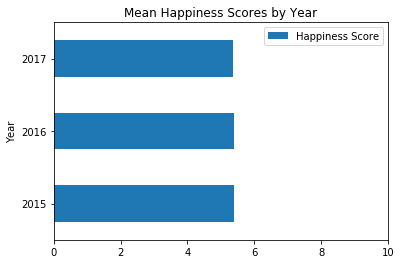

In [14]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
# pd.concat method

sel_2015 = happiness2015
sel_2016 = happiness2016
sel_2017 = happiness2017
combined = pd.concat([sel_2015, sel_2016, sel_2017], axis=0, sort = True)

pivot_table_combined = combined.pivot_table(values='Happiness Score', index='Year')
pivot_table_combined.plot.barh(title = 'Mean Happiness Scores by Year', xlim = (0, 10))

In [15]:
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


#### - - - done! - - - 